### Шаг 1
<div class="alert alert-block alert-info">
Импортирую нужные библиотеки. Открываю датасет. Смотрю общую информацию.
</div>

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [179]:
df = pd.read_csv("/datasets/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<span style="color:green">
    <h3> Ответ на комментарий: <a class="tocSkip"> </h3>
        
Большое количество пропусков в столбцах с оценками,и рейтингами. Удалять не будем потому что их очень много, рассмотрим можно ли их заменить. Для начала приведем все названия столбцов к нижнему регистру, и поменяем тип данных там, где это может нам помочь.
<span>

### Шаг 2. Подготовка данных.
<div class="alert alert-block alert-info">
Привожу все названия столбцов к нижнему регистру.
</div>

In [180]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
В столбце "user_score" есть значения "tbd", скорее всего это "to be determined", что означает что оценки еще нет. Заменю "tbd" значением "NaN", и поменяю тип данных на float32, чтобы занимало меньше памяти.
</div>

In [181]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<span style="color:green">
   
       
В столбцах "name" и "genre", есть по два пропуска, удалю их и обновлю индексацию в датасете.
<span>

In [182]:
df = df.dropna(subset = ['name','genre']).reset_index(drop=True)
#df.info()

In [183]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [184]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('min'))

In [185]:
df.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<span style="color:green">
        
Пропуски в столбцах "name" и "genre" удалил, и обновил индексацию. В столбце "year_of_release" заменил часть пропусков минимальным годом релиза по игре, остальные оставлю. Их не так много чтобы повлиять на анализ, но и удалять их не буду.
<span>

In [186]:
df['year_of_release'] = df['year_of_release'].convert_dtypes() #поменял тип данных в столбце "год релиза" на целочисленный

In [187]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df["user_score"] = df["user_score"].astype('float32')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

<div class="alert alert-block alert-info">
Заполняю пропуски в столбце рейтинг на 'unknown'.
</div>

In [188]:
df['rating'] = df['rating'].fillna('unknown')

<div class="alert alert-block alert-info">
Создам новый столбец с суммой всех столбцов продаж.
    
Поменял типы данных с float64 на float32, для экономии памяти.
    

</div>

In [189]:
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [190]:
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')
df['critic_score'] = df['critic_score'].astype('float32')
df['all_sales'] = df['all_sales'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           16713 non-null  object 
 11  all_sales        16713 non-null  float32
dtypes: Int64(1), float32(7), object(4)
memory usage: 1.1+ MB


In [191]:
df.duplicated().sum()

0

<span style="color:green">
        
Поменяли тип данных в стоолбцах с продажами и оценками на float32, для экономии памяти. В столбце с рейтингом было много пропусков, порядка 40%. Заменил их на "unknown"(неизвестно), т.к. не во всех странах используется именно система ESRB. В стольбце с оценками пользователей были значения "tbd"(to be determined), означающие что оценка еще не поставлена, заменил эти значения на NaN, чтобы с ними можно было работать в дальнейшем анализе.
<span>

### Шаг. Исследовательский анализ данных. 

<div class="alert alert-block alert-info">
Исследовательский анализ данных:
    
•	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
•	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    
•	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    
•	Не учитывайте в работе данные за предыдущие годы.
    
•	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    
•	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
•	Соотнесите выводы с продажами игр на других платформах.
    
•	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

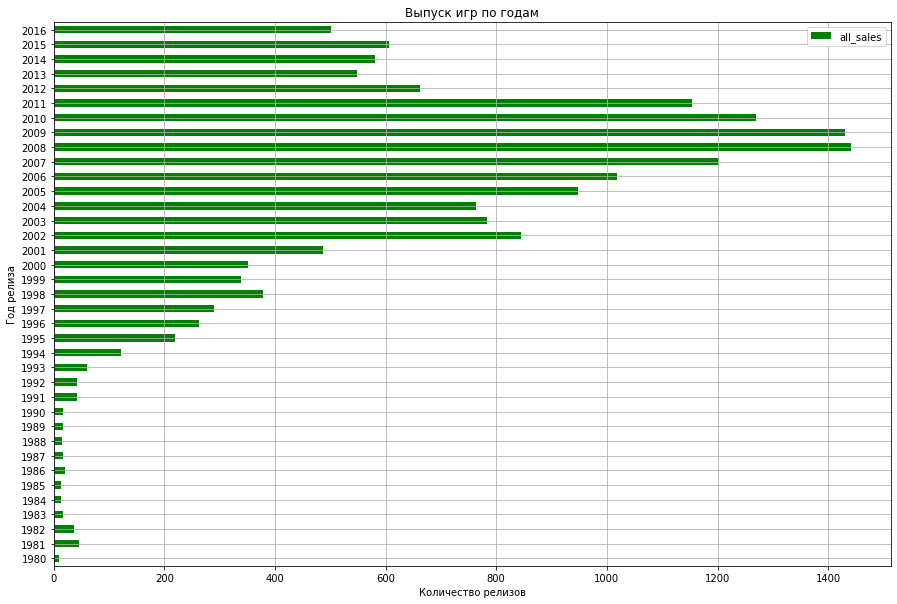

In [192]:
year_sales = pd.pivot_table(df,index='year_of_release',values='all_sales',aggfunc='count').plot.barh(figsize=(15,10),color='green',grid=True)
plt.title('Выпуск игр по годам')
plt.xlabel('Количество релизов')
plt.ylabel('Год релиза')
plt.show()

<div class="alert alert-block alert-info">
Судя по графику большее количество игр было выпущенно в 2008 и 2009 годах.
</div>

In [193]:
top_platform = df[df['year_of_release'] >= 1994].pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales',ascending=False).head(10)
top_platform

,all_sales
platform,
PS2,1247.160034
X360,966.609985
PS3,934.710022
Wii,903.309998
DS,804.260010
PS,727.580017
PS4,314.140015
GBA,313.730011
PSP,293.570007


<div class="alert alert-block alert-info">
Cоздал сводную таблицу по годам с 1994, по платформам и продажам. До 1994 было выпущено очень мало игр. Отсортировал от большего к меньшему. Для дальнейшего анализа возьму 5 платформ.
</div>

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

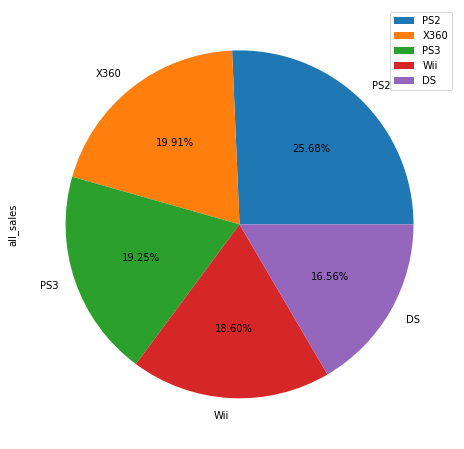

In [194]:
top_platform.head(5).plot(y='all_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
top_platform.head(5).index

<div class="alert alert-block alert-info">
Создал круговую диаграмму с продажами в процентном соотношении по платформам. Play Station 2 лидирует, на последнем месте DS.
</div>

<div class="alert alert-block alert-info">
Построим графики по каждой платформе, чтобы рассмотреть как меняются продажи от года к году.
</div>

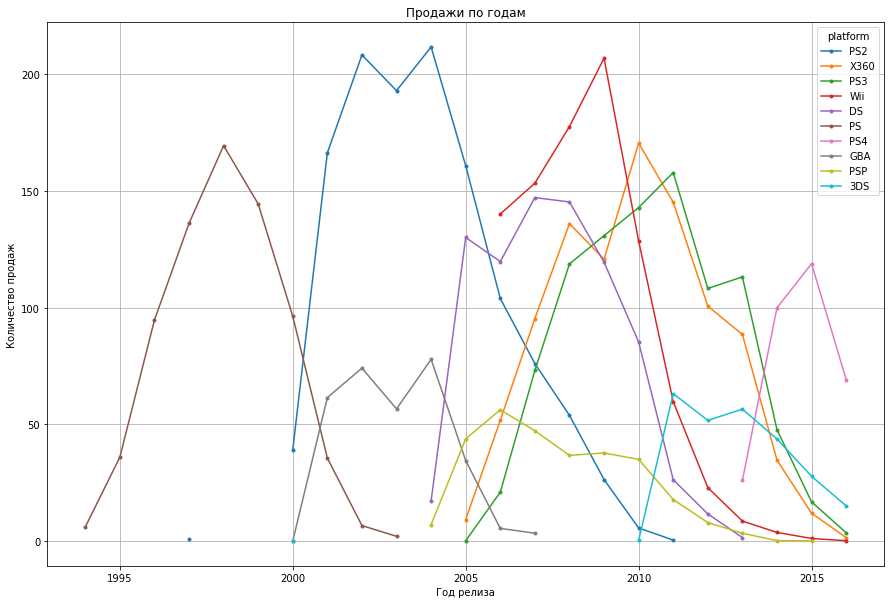

In [195]:
year_platform = df.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum')# Создаю сводную таблицу с годами, платформами и продажами котрые нас интересуют
#year_platform
df1994 = year_platform.query('year_of_release >= 1994') #сделал срез по сводной таблице, только с годами которые нас интересуют.
df1994.plot(y=top_platform.index,figsize=(15,10),grid=True,marker='.')
plt.title('Продажи по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж')
plt.show()

<div class="alert alert-block alert-info">
По графику видно что большинство продаж приходилось на PS2, среди всех платформ за период. В среднем период популярности платформ около 10 лет. Даты выпуска приставок:
    
• PS2 - 4 марта 2000 г.
    
• X360 - 22 ноября 2005 г.
    
• PS3 - 11 ноября 2006 г.
    
• Wii - 19 ноября 2006 г.
    
• DS - 21 ноября 2004 г.
</div>

<span style="color:green">
        
Возьмем актуальный период для анализа 3 года. Создаю сводную по актуальному периоду, и платформам.
<span>

In [196]:
df_act_per = df.query('year_of_release >= 2014')
df_act_pivot = df_act_per.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').fillna(0)
df_act_pivot

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.760002,13.28,47.760002,100.000000,0.24,11.90,3.75,22.030001,34.740002,54.070000
2015,27.779999,8.52,16.820000,118.900002,0.12,6.25,1.14,16.350000,11.960000,60.139999
2016,15.140000,5.25,3.600000,69.250000,0.00,4.25,0.18,4.600000,1.520000,26.150000


<span style="color:green">
    <h3> Дополнение кода: <a class="tocSkip"> </h3>
        
Построю график по продажам, за актуальный период времени. И посмотрим какие платформы наиболее прибыльны или наоборот.
<span>

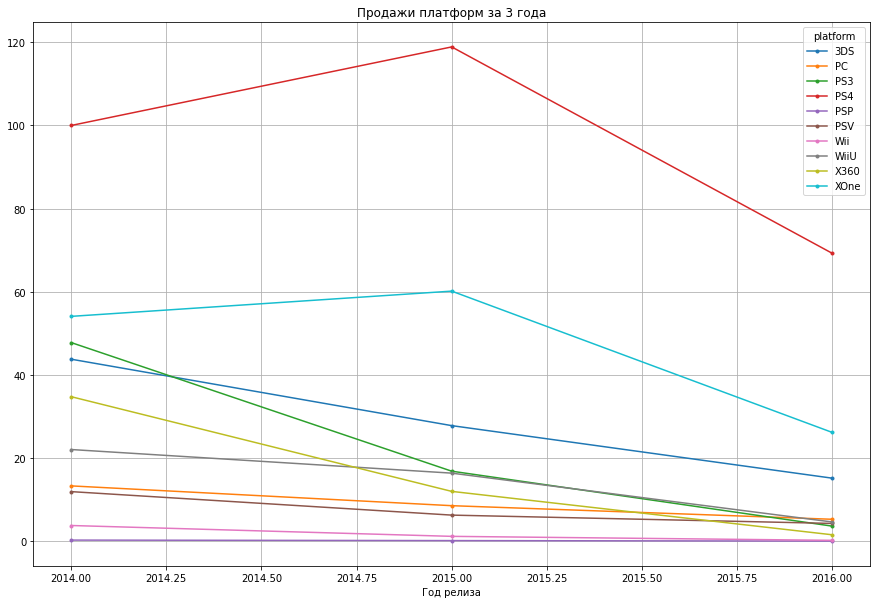

In [197]:
df_act_pivot.plot(figsize=(15,10),grid=True,marker='.')
plt.title('Продажи платформ за 3 года')
plt.xlabel('Год релиза')
plt.show()

<span style="color:green">
        
Актуальный период для анализа - 3 года. Продажи по всем платформа падают к концу периода, но данные за 2016 год, могут быть неполными. Самые прибыльные платформы за актуальный период: PS4, XOne, 3DS, PC и WiiU.
<span>

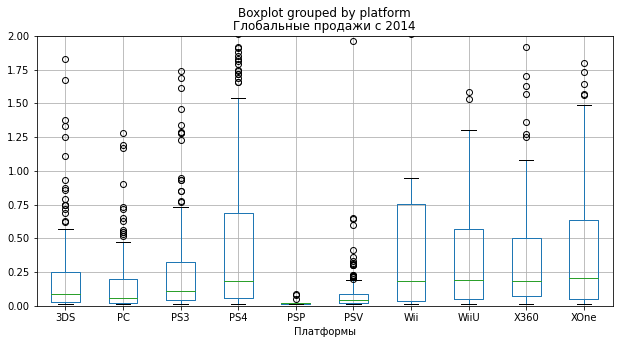

In [198]:
df_act_per.boxplot('all_sales',by='platform',figsize=(10,5))
plt.title('Глобальные продажи с 2014')
plt.xlabel('Платформы')
plt.ylim([0, 2])
plt.show()

<div class="alert alert-block alert-info">
Посмотрим, как влияют на продажи одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
</div>

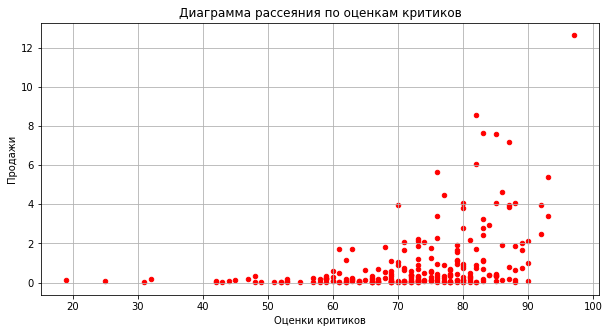

In [199]:
ps4_platform = df_act_per.query('platform == "PS4"') 
ps4_platform.plot.scatter(y='all_sales', x='critic_score', figsize=(10,5),c='red',grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

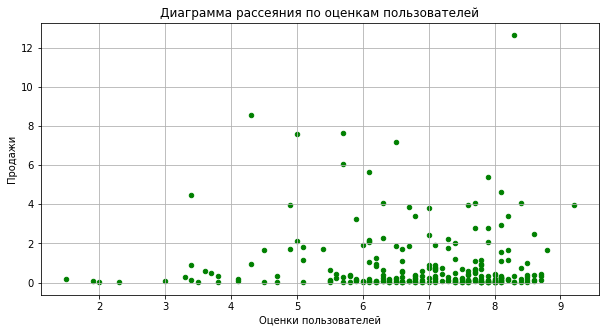

In [200]:
ps4_platform.plot.scatter(y='all_sales', x='user_score', figsize=(10,5),c='green',grid=True)
plt.title('Диаграмма рассеяния по оценкам пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

<div class="alert alert-block alert-info">
Оценки на прямую влияют на продажи. Посчитаем корреляцию:
</div>

In [201]:
ps4_platform[['critic_score','all_sales']].corr() #Корреляция по оценкам критиков

,critic_score,all_sales
critic_score,1.000000,0.402661
all_sales,0.402661,1.000000


<span style="color:green">
Коэффициент корреляции Пирсона по оценкам критиков, положительный. Связь есть, оценки критиков влияют на продажи.
<span>

In [202]:
ps4_platform[['user_score','all_sales']].corr() #Корреляция по оценкам пользователей

,user_score,all_sales
user_score,1.000000,-0.040132
all_sales,-0.040132,1.000000


<span style="color:green">
Коэффициент корреляции Пирсона по оценкам пользователей, отрицательный. Оценки пользователей слабо влияют на продажи.
<span>

<div class="alert alert-block alert-info">
Самые большие продажи у PS4, судя по диаграмме. Посмотрим на диаграммы для других платформ:
</div>

In [203]:
df_act_pivot

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.760002,13.28,47.760002,100.000000,0.24,11.90,3.75,22.030001,34.740002,54.070000
2015,27.779999,8.52,16.820000,118.900002,0.12,6.25,1.14,16.350000,11.960000,60.139999
2016,15.140000,5.25,3.600000,69.250000,0.00,4.25,0.18,4.600000,1.520000,26.150000


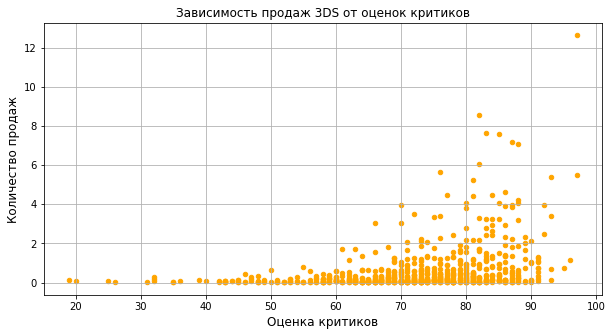

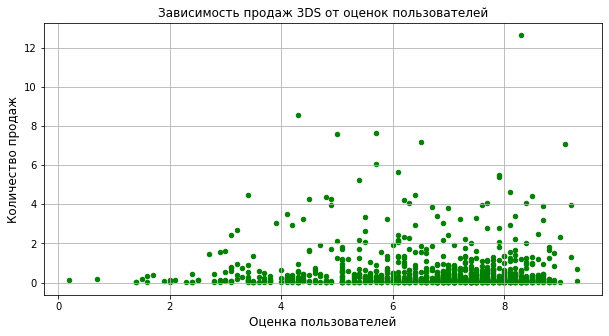

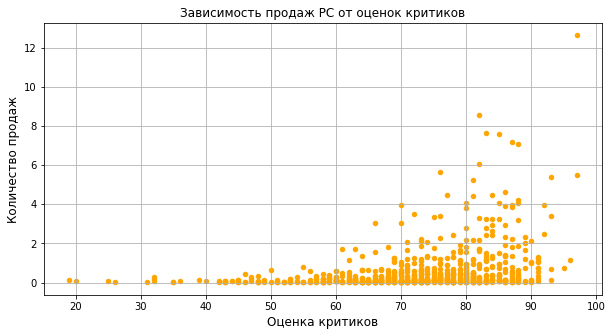

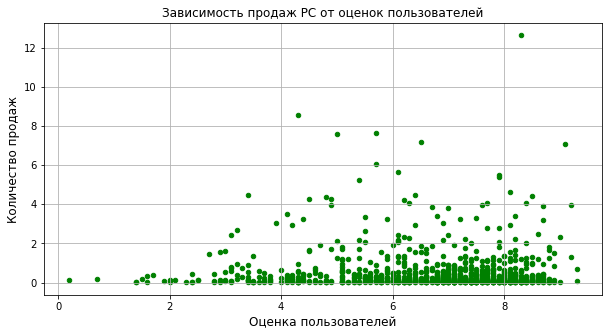

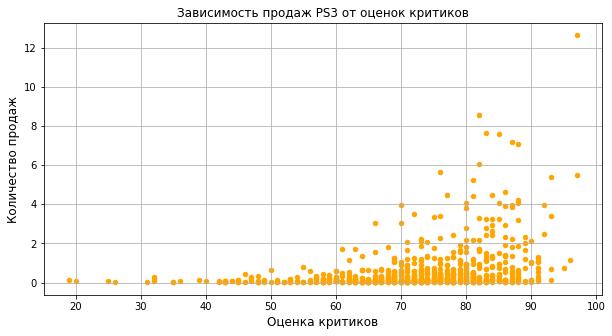

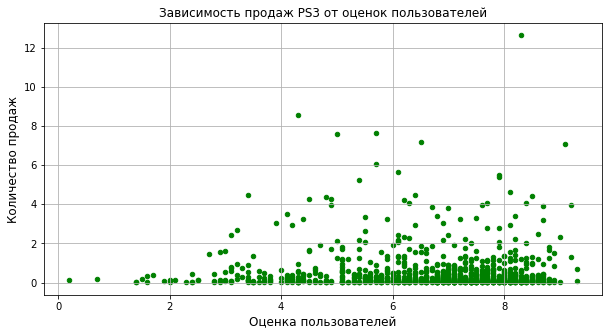

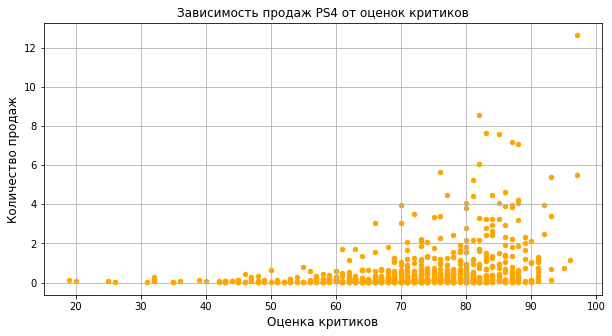

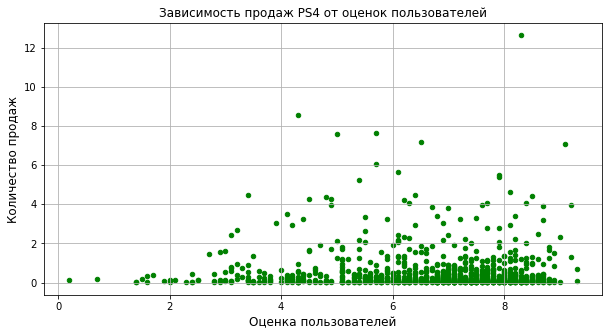

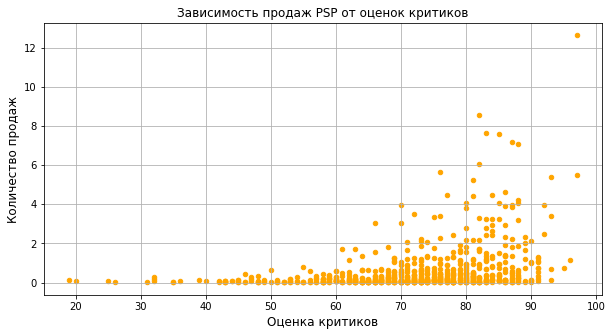

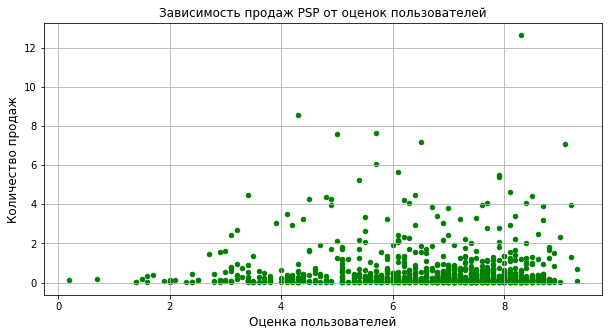

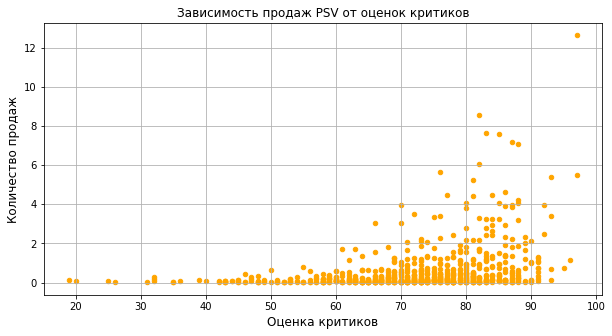

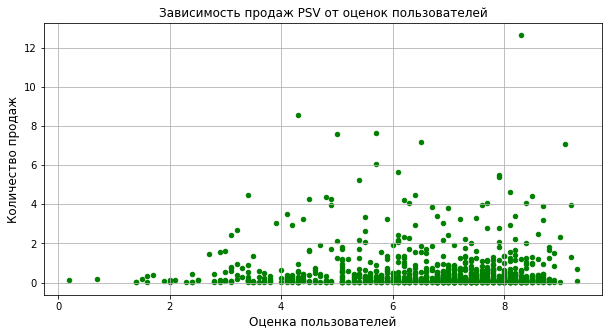

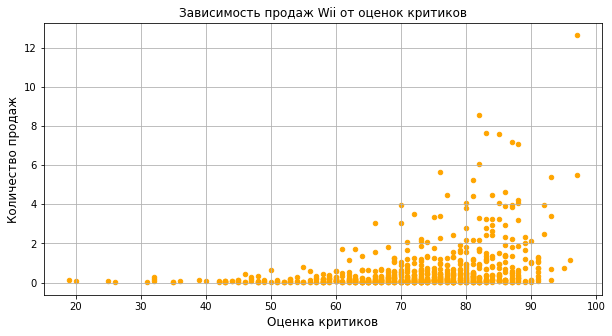

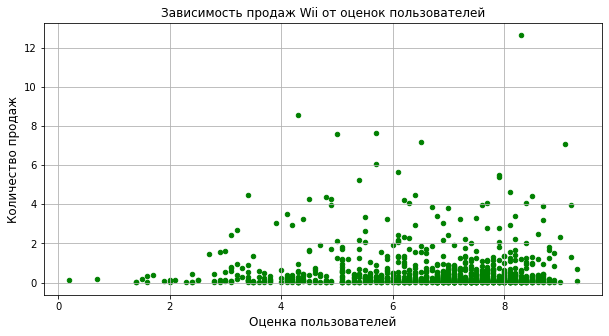

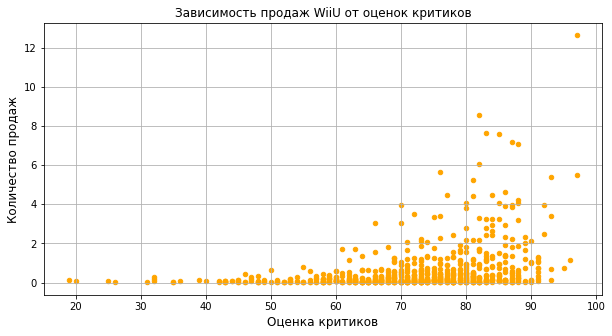

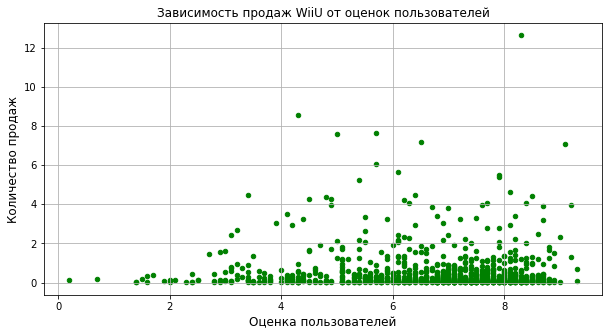

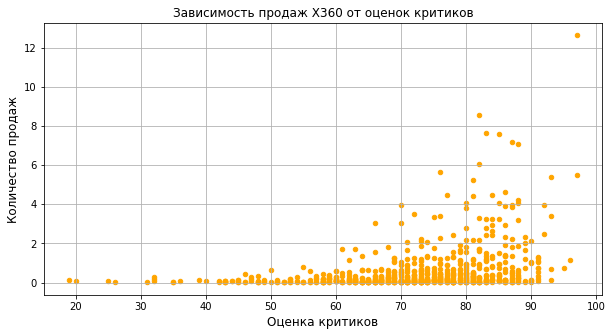

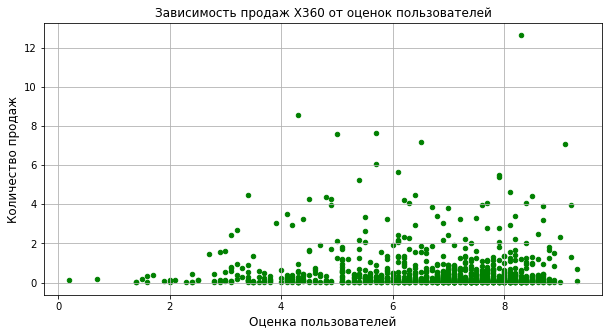

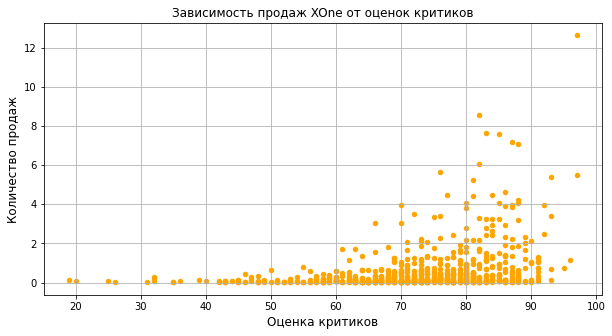

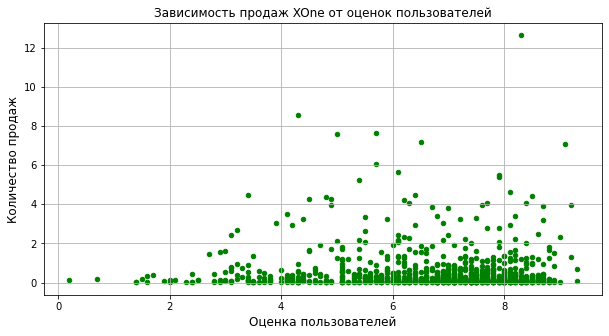

In [204]:
for el in df_act_pivot.columns[0:]:
    df_act_per.plot.scatter(y='all_sales', x='critic_score', figsize=(10,5),c='orange',grid=True)
    plt.title(f'Зависимость продаж {el} от оценок критиков')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.xlabel('Оценка критиков', fontsize = 'large')
    plt.show()
    df_act_per.plot.scatter(y='all_sales', x='user_score', figsize=(10,5),c='green',grid=True)
    plt.title(f'Зависимость продаж {el} от оценок пользователей')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.xlabel('Оценка пользователей', fontsize = 'large')
    plt.show()

In [205]:
xone_platform = df_act_per.query('platform == "XOne"')#Продажи зависят от оценок критиков, от оценки пользователей - нет.
print('Коэффициент корреляции Пирсона, XOne:')
print(xone_platform[['user_score','critic_score','all_sales']].corr())

ds3_platform = df_act_per.query('platform == "3DS"')#Продажи напрямую имеют зависимость от обоих типов оценок. От оценок критиков сильнее.
print('Коэффициент корреляции Пирсона, 3DS:')
print(ds3_platform[['user_score','critic_score','all_sales']].corr())

pc_platform = df_act_per.query('platform == "PC"')#Продажи зависят от оценок критиков, от оценки пользователей - нет.
print('Коэффициент корреляции Пирсона, PC:')
print(pc_platform[['user_score','critic_score','all_sales']].corr())

wiiu_platform = df_act_per.query('platform == "WiiU"')#Продажи напрямую имеют зависимость от обоих типов оценок.
print('Коэффициент корреляции Пирсона, WiiU:')
print(wiiu_platform[['user_score','critic_score','all_sales']].corr())

ps3_platform = df_act_per.query('platform == "PS3"')#Продажи зависят от оценок критиков, от оценки пользователей - нет.
print('Коэффициент корреляции Пирсона, PS3:')
print(ps3_platform[['user_score','critic_score','all_sales']].corr())

psp_platform = df_act_per.query('platform == "PSP"')
print('Коэффициент корреляции Пирсона, PSP:')
print(psp_platform[['user_score','critic_score','all_sales']].corr())

psv_platform = df_act_per.query('platform == "PSV"')#Продажи зависят от оценок критиков, от оценки пользователей - нет.
print('Коэффициент корреляции Пирсона, PSV:')
print(psv_platform[['user_score','critic_score','all_sales']].corr())

x360_platform = df_act_per.query('platform == "X360"')#Продажи зависят от оценок критиков, от оценки пользователей - нет.
print('Коэффициент корреляции Пирсона, X360:')
print(x360_platform[['user_score','critic_score','all_sales']].corr())

wii_platform = df_act_per.query('platform == "Wii"')
print('Коэффициент корреляции Пирсона, Wii:')
print(wii_platform[['user_score','critic_score','all_sales']].corr())

Коэффициент корреляции Пирсона, XOne:
              user_score  critic_score  all_sales
user_score      1.000000      0.440977  -0.070384
critic_score    0.440977      1.000000   0.428677
all_sales      -0.070384      0.428677   1.000000
Коэффициент корреляции Пирсона, 3DS:
              user_score  critic_score  all_sales
user_score      1.000000      0.862485   0.215193
critic_score    0.862485      1.000000   0.314117
all_sales       0.215193      0.314117   1.000000
Коэффициент корреляции Пирсона, PC:
              user_score  critic_score  all_sales
user_score      1.000000      0.466099  -0.071597
critic_score    0.466099      1.000000   0.174634
all_sales      -0.071597      0.174634   1.000000
Коэффициент корреляции Пирсона, WiiU:
              user_score  critic_score  all_sales
user_score      1.000000      0.763536   0.407926
critic_score    0.763536      1.000000   0.370201
all_sales       0.407926      0.370201   1.000000
Коэффициент корреляции Пирсона, PS3:
              

<span style="color:green">
Судя по коэффициентам корреляции, можно утверждать, что в основном на продажи влияют оценки критиков. В некоторых случаях так же есть взаимосвязь и с оценками пользователей .Коэффициент невозможно посчитать для платформ Wii и PSP, т.к. продажи по ним практически свелись к нулю, и сами платформы уже не популярны.
<span>

<div class="alert alert-block alert-info">
Посмотрим на общее распределение игр по жанрам.
</div>

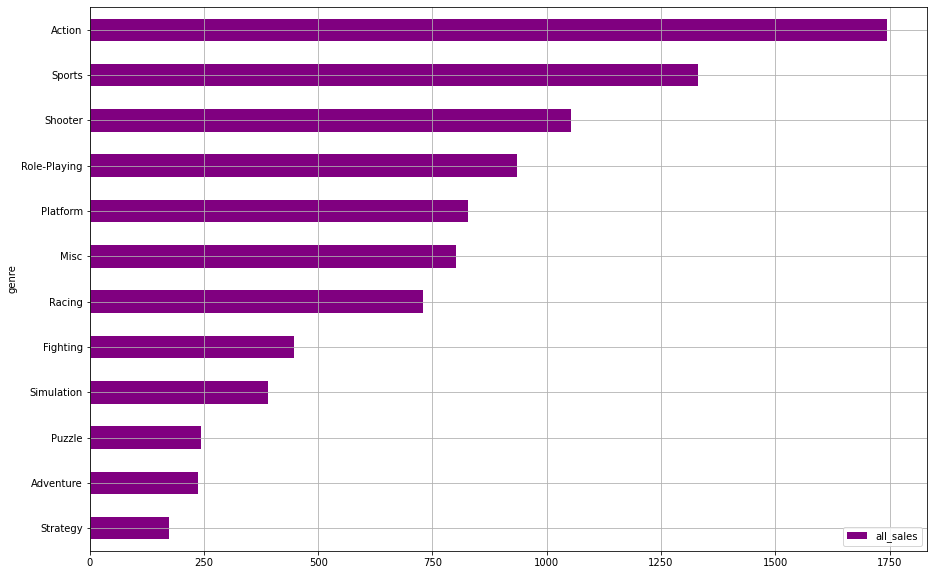

In [206]:
genre_game = df.pivot_table(index='genre',values='all_sales',aggfunc='sum').sort_values('all_sales')
genre_game.plot.barh(figsize=(15,10),grid=True,color='purple')
plt.show()

<div class="alert alert-block alert-info">
Самые прибыльные жанры: action, sports, shooter, role-playing, platform.

Самые не прибыльные: strategy, adventure, puzzle, simulation, fighting.
    
Это распределение за все время, возьмем актуальный период времени, с 2014 года. 
</div>

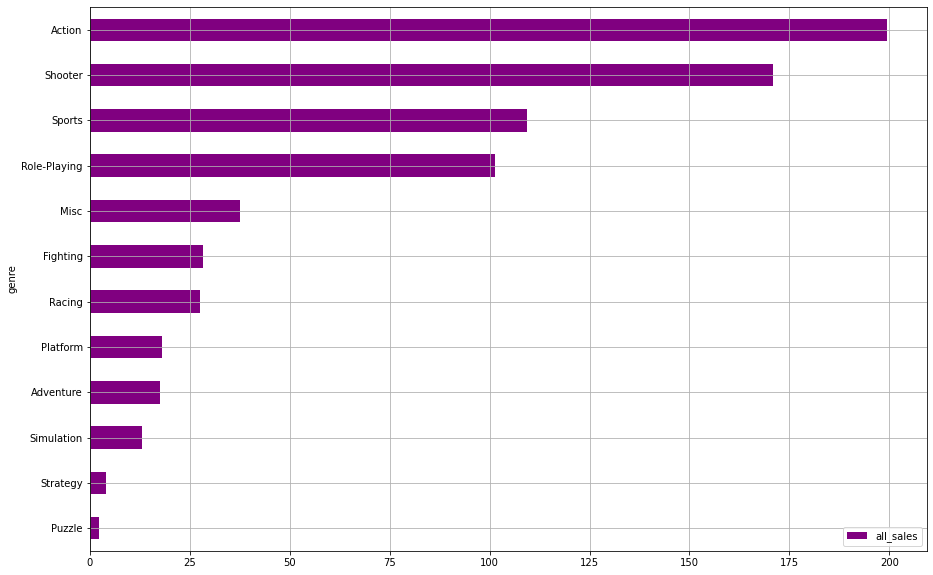

In [207]:
genre_game_act = df_act_per.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales')
genre_game_act.plot.barh(figsize=(15,10),grid=True,color='purple')
plt.show()

<div class="alert alert-block alert-info">
    
Самые прибыльные жанры: action, shooter, sports, role-playing, misc. Игры с жанром "misc"(другое), продаются лучше чем "platform"(платформеры). Я думаю экшены и шутеры можно считать самыми потенциально прибыльными жанрами, они хорошо влияют на продажи.
    
Самые не прибыльные: puzzle, strategy, simulation, adventure, platform.

За актуальный период времени почти ничего не поменялось. Жанр puzzle продается хуже всего, а жанр action очень большой отрыв по сравнению с жанрами после shooter.
    
Построим график "ящик с усами", чтобы рассмотреть средние и медианные продажи.
</div>

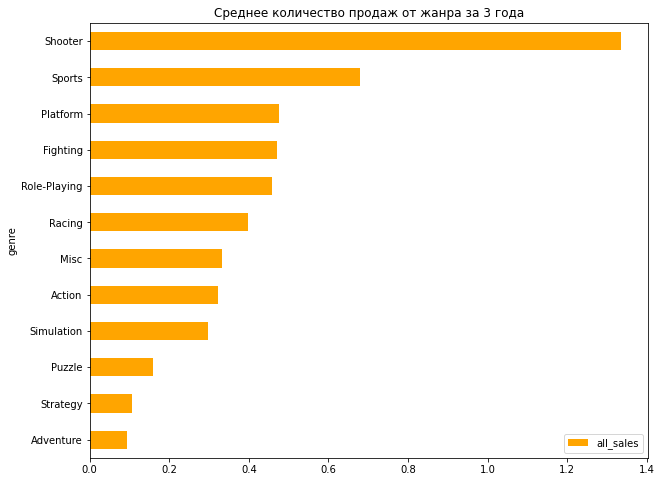

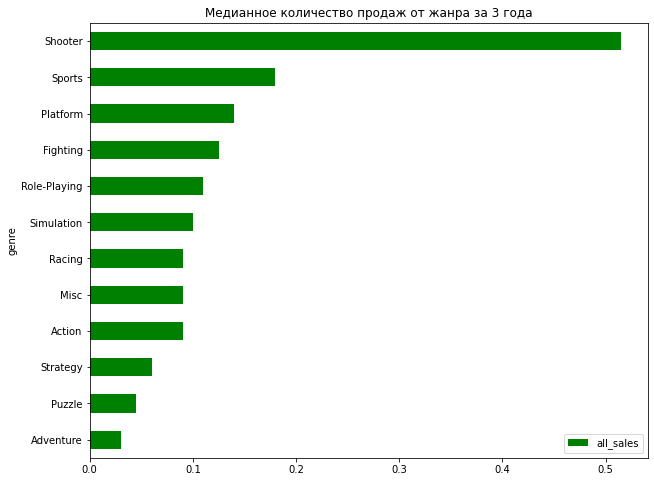

In [208]:
genre_act_mean = df_act_per.pivot_table(index='genre', values='all_sales', aggfunc='mean').sort_values('all_sales')
genre_act_mean.plot.barh(figsize=(10,8), color='orange')
plt.title('Среднее количество продаж от жанра за 3 года')
plt.show()

genre_act_med = df_act_per.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values('all_sales')
genre_act_med.plot.barh(figsize=(10,8), color='green')
plt.title('Медианное количество продаж от жанра за 3 года')
plt.show()

In [209]:
#genre_act.boxplot('all_sales', by='genre', figsize=(12,6))
#plt.title('Продажи по жанрам с 2014')
#plt.xlabel('Жанры')
#plt.show()

### Шаг. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


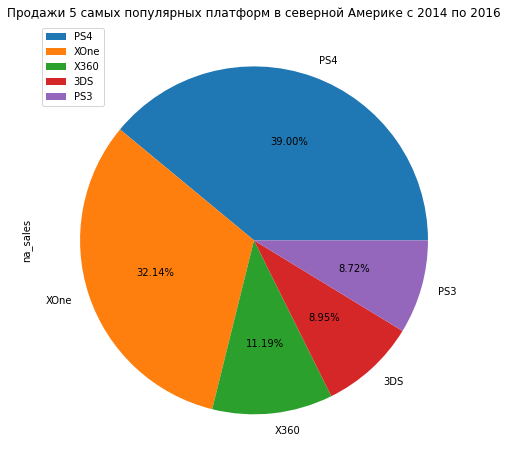

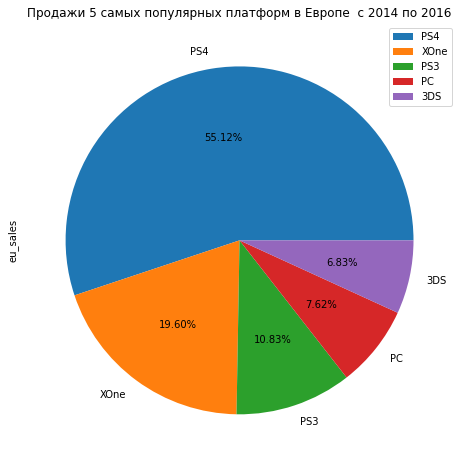

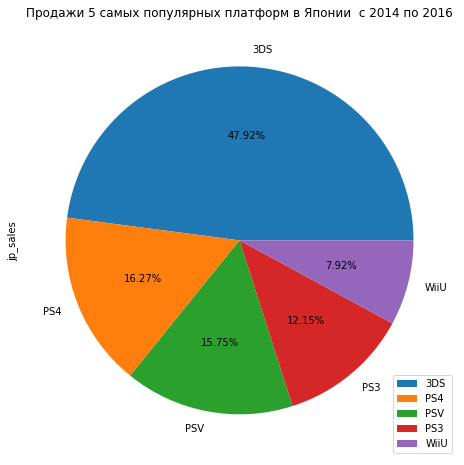

In [210]:
top_five_na = df_act_per.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head(5)
top_five_na.plot(y='na_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Продажи 5 самых популярных платформ в северной Америке с 2014 по 2016')
plt.show()

top_five_eu = df_act_per.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head(5)
top_five_eu.plot(y='eu_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Продажи 5 самых популярных платформ в Европе  с 2014 по 2016')
plt.show()

top_five_jp = df_act_per.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head(5)
top_five_jp.plot(y='jp_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Продажи 5 самых популярных платформ в Японии  с 2014 по 2016')
plt.show()

<div class="alert alert-block alert-info">
   Продажи топ-5 платформ по регионам с 2013 по 2016:
    
• **Северная Америка:**
    
PS4 - 39.00%
    
XOne - 32.14%
    
X360 - 11.19%
    
PS3 - 8.95%
    
3DS - 8.72%

• **Европа:**
    
PS4 - 55.12%
    
PS3 - 10.83%
    
XOne - 19.60%
    
PC - 7.62%
    
3DS - 6.83%

• **Япония:**
    
3DS - 47.92%
    
PS4 - 16.27%
    
PSV - 15.75%
    
PS3 - 12.15%
    
WiiU - 7.92%
</div>

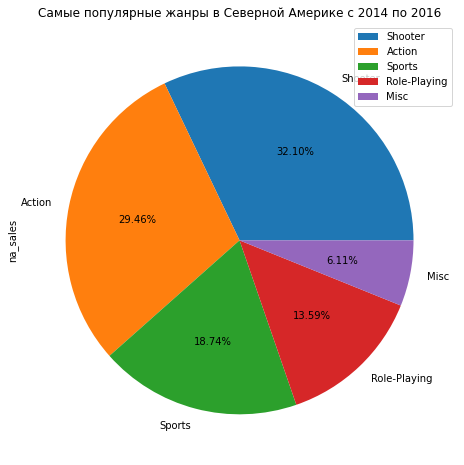

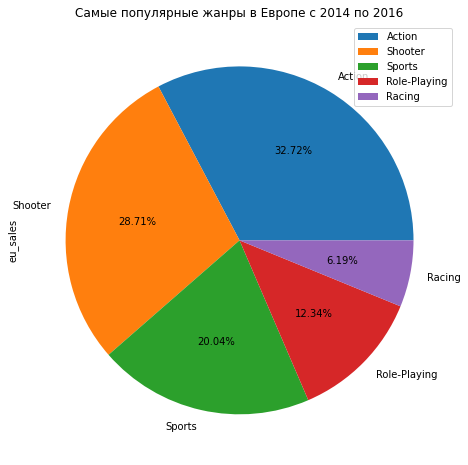

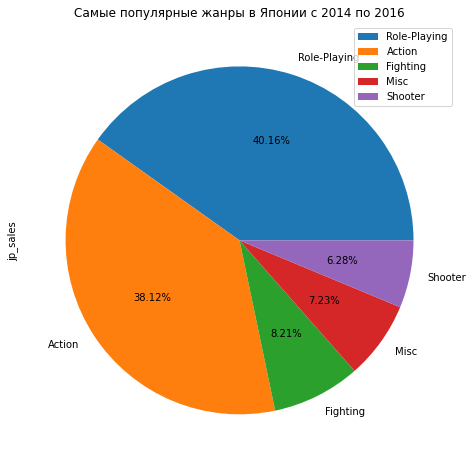

In [211]:
top_genre_na = df_act_per.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head(5)
top_genre_na.plot(y='na_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Самые популярные жанры в Северной Америке с 2014 по 2016')
plt.show()

top_genre_eu = df_act_per.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head(5)
top_genre_eu.plot(y='eu_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Самые популярные жанры в Европе с 2014 по 2016')
plt.show()

top_genre_jp = df_act_per.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head(5)
top_genre_jp.plot(y='jp_sales', kind='pie',figsize=(8,8),autopct='%1.2f%%')
plt.title('Самые популярные жанры в Японии с 2014 по 2016')
plt.show()

<div class="alert alert-block alert-info">
   Топ-5 жанров по регионам с 2014 по 2016:
    
• **Северная Америка:**
    
Shooter - 32.10%
    
Action - 29.46%
    
Sports - 18.74%
    
Role-Playing - 13.59%
    
Misc - 6.11%

• **Европа:**
    
Action - 32.72%
    
Shooter - 28.71%
    
Sports - 20.04%
    
Role-Playing - 12.34%
    
Racing - 6.19%

• **Япония:**
    
Role-Playing - 40.16%
    
Action - 38.12%
    
Fighting - 8.21%
    
MIsc - 7.23%
    
Adventure - 6.28%
</div>

<div class="alert alert-block alert-info">
Построим графики продаж по рейтингу для каждого региона. Список рейтингов:

«EC» («Early childhood») — «Для детей младшего возраста»
    
«E» («Everyone») — «Для всех»
    
"K-A" ("Kids to Adults") — «Для всех»
    
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    
«T» («Teen») — «Подросткам»
    
«M» («Mature») — «Для взрослых»
    
«AO» («Adults Only 18+») — «Только для взрослых»
    
«RP» («Rating Pending») — «Рейтинг ожидается»
</div>

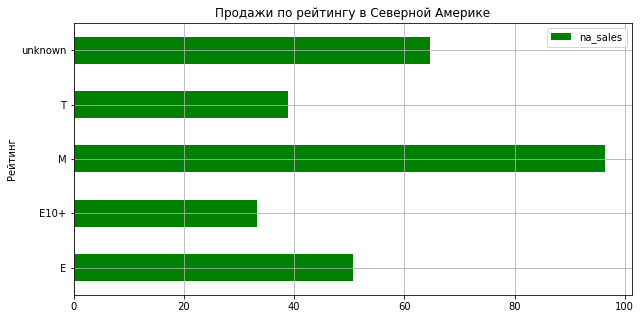

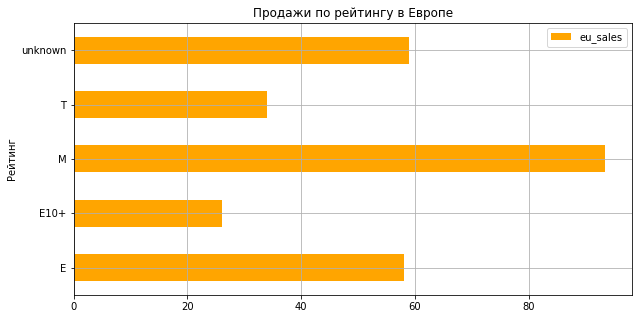

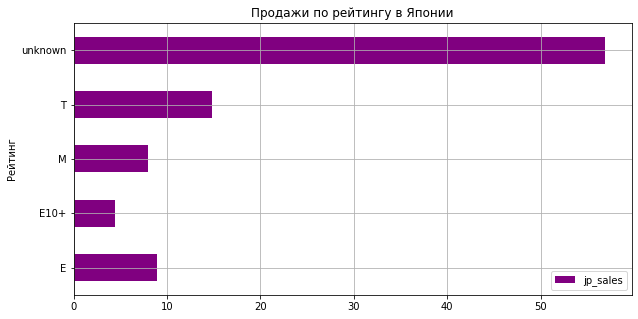

In [212]:
rating_na = df_act_per.pivot_table(index='rating',values='na_sales',aggfunc='sum')
rating_na.plot.barh(figsize=(10,5),grid=True,color='green')
plt.title('Продажи по рейтингу в Северной Америке')
plt.ylabel('Рейтинг')
plt.show()

rating_eu = df_act_per.pivot_table(index='rating',values='eu_sales',aggfunc='sum')
rating_eu.plot.barh(figsize=(10,5),grid=True,color='orange')
plt.title('Продажи по рейтингу в Европе')
plt.ylabel('Рейтинг')
plt.show()

rating_jp = df_act_per.pivot_table(index='rating',values='jp_sales',aggfunc='sum')
rating_jp.plot.barh(figsize=(10,5),grid=True,color='purple')
plt.title('Продажи по рейтингу в Японии')
plt.ylabel('Рейтинг')
plt.show()

<div class="alert alert-block alert-info">
• В Северной Америке самые максимальные продажи с рейтингом "Для взрослых", следом рейтинг "Для всех"
    
• В Европе ситуация аналогичная, как и Северной Америке. 
    
• В Японии скорее всего не используют рейтинг ESRB.
</div>

<div class="alert alert-block alert-info">
    
Портреты пользоватей для каждого региона с 2013 по 2016: 
    
•**Северная Америка:**
    Человек играющий в игры жанра Shooter на консоли PlayStation 4, с рейтингом "для взрослых".
    
•**Европа:**
    Человек играющий в игры жанра Action на консоли PlayStation 4, с рейтингом "для взрослых".
    
•**Япония:**
    Человек играющий в игры жанра Role-Playing на портативной консоли Nintendo 3DS, без определенного рейтинга.
    

</div>

<span style="color:green">
        
Средний покупатель из Северной Америки и стран Европы очень похож: совершеннолетний, в основном играет на PS4, в игры с рейтингом "+18", но чуть в разные жанры. В Северной Америки популярнее шутеры, а в Европе экшен. В Японии больше всего продаж игр с рейтингом "для подростков" или с отсутсвующим рейтингом. Пользователи из Северной Америки и Европы предпочитают декстопные консоли(PS4, XOne, PC), тогда как пользователи из Японии предпочитают портативную Nintendo 3DS.
<span>

### Шаг. Проверьте гипотезы
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<div class="alert alert-block alert-info">
    
```
H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны`
H_a: Средние пользовательские рейтинги платформ Xbox One и PC не равны`
alpha = 0.05
```
    
Делаю срезы по названию платформы, без пропущенных значений столбца "user_score":
</div>

In [213]:
xbox = df_act_per.query('platform == "XOne" and not user_score.isna()')['user_score'] 
pc = df_act_per.query('platform == "PC" and not user_score.isna()')['user_score']

results = st.ttest_ind(xbox, pc, equal_var=False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
Гипотезу что средние пользовательские рейтинги равны не отвергаем.
    
Аналогично проверяем гипотезу, что средние пользовательские рейтинги жанров экшен и спорт разные:
    
```
H_0: Средние пользовательские рейтинги жанров Action и Sports равны.`
H_a: Средние пользовательские рейтинги жанров Action и Sports не равны.
alpha = 0.05
```
</div>

In [214]:
action = df_act_per.query('genre == "Action" and not user_score.isna()')['user_score']
sport = df_act_per.query('genre == "Sports" and not user_score.isna()')['user_score']

results = st.ttest_ind(action, sport, equal_var=False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825638224397033e-14
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
Нулевую гипотезу отвергаем. Альтернативная гипотеза верна.
</div>

### Шаг. Общий вывод.

<div class="alert alert-block alert-info">
• Самые прибыльные платформы Nintendo 3DS, XBox One и Play Station 4. Самая прибыльная платформа - Play Station 4, в периоде с 2014 по 2016. 
    
• Пользователи из Америки и Европы очень похожи, в отличие от пользователей Японии.
    
• Продажи к концу актуального периода снижаются, из за того что данные за 2016 год неполные.
    
• Самые прибыльные жанры это Action, Sports и Shooter, для Северной Америки и Европы. И Role-Playing, Action и Fighting для Японии, за последние 3 года.
    
• Примерная жизнь консоли ~ 10 лет.
    
• Оценки критиков и пользователей влияют на продажи, но взаимосвязб от оценок критиков больше, чем выше оценка, чем больше продаж.
    
• Система рейтинга менее востребована в Японии, скорее всего потому что там есть своя организация Computer Entertainment Rating Organization(CERO).
    </div>